# VGG-16 for image classification

In [1]:
from keras.preprocessing.image import ImageDataGenerator
img_width, img_height = 224, 224

train_data_dir = 'DATA_1/Train'
validation_data_dir = 'DATA_1/Test'

test_datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
                                  a

train_datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

Using Theano backend.


# Model Architecture

In [2]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense


model_vgg = Sequential()
model_vgg.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
model_vgg.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
model_vgg.add(ZeroPadding2D((1,1)))
model_vgg.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
model_vgg.add(MaxPooling2D((2,2), strides=(2,2)))

model_vgg.add(ZeroPadding2D((1,1)))
model_vgg.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
model_vgg.add(ZeroPadding2D((1,1)))
model_vgg.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
model_vgg.add(MaxPooling2D((2,2), strides=(2,2)))

model_vgg.add(ZeroPadding2D((1,1)))
model_vgg.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
model_vgg.add(ZeroPadding2D((1,1)))
model_vgg.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
model_vgg.add(ZeroPadding2D((1,1)))
model_vgg.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
model_vgg.add(MaxPooling2D((2,2), strides=(2,2)))

model_vgg.add(ZeroPadding2D((1,1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
model_vgg.add(ZeroPadding2D((1,1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
model_vgg.add(ZeroPadding2D((1,1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
model_vgg.add(MaxPooling2D((2,2), strides=(2,2)))

model_vgg.add(ZeroPadding2D((1,1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
model_vgg.add(ZeroPadding2D((1,1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
model_vgg.add(ZeroPadding2D((1,1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
model_vgg.add(MaxPooling2D((2,2), strides=(2,2)))

model_vgg.add(Flatten(name="flatten"))
model_vgg.add(Dense(4096, activation='relu', name='dense_1'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(4096, activation='relu', name='dense_2'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(2, name='dense_3'))
model_vgg.add(Activation("softmax",name="softmax"))

In [3]:
print model_vgg.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           zeropadding2d_input_1[0][0]      
____________________________________________________________________________________________________
conv1_1 (Convolution2D)          (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           conv1_1[0][0]                    
____________________________________________________________________________________________________
conv1_2 (Convolution2D)          (None, 64, 224, 224)  36928       zeropadding2d_2[0][0]            
___________________________________________________________________________________________

In [4]:
model_vgg.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
nb_epoch = 50
nb_train_samples = 5312
nb_validation_samples = 1332

/home/naveen/anaconda2/envs/keras_theano/lib/python2.7/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


# Trainig the model

In [5]:
model_vgg.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)
model_vgg.save('/home/naveen/final-model.h5', model_vgg)

Epoch 1/50
5312/5312 [==============================] - 3910s - loss: 0.6808 - acc: 0.6178 - val_loss: 0.6440 - val_acc: 0.6719
Epoch 2/50
5312/5312 [==============================] - 3932s - loss: 0.6400 - acc: 0.6583 - val_loss: 0.6793 - val_acc: 0.5113
Epoch 3/50
5312/5312 [==============================] - 3970s - loss: 0.6719 - acc: 0.5847 - val_loss: 0.6230 - val_acc: 0.7312
Epoch 4/50
5312/5312 [==============================] - 3962s - loss: 0.6521 - acc: 0.6555 - val_loss: 0.6211 - val_acc: 0.6674
Epoch 5/50
5312/5312 [==============================] - 4409s - loss: 0.6435 - acc: 0.6455 - val_loss: 0.6316 - val_acc: 0.6764
Epoch 6/50
5312/5312 [==============================] - 5367s - loss: 0.6062 - acc: 0.6943 - val_loss: 0.3948 - val_acc: 0.8423
Epoch 7/50
5312/5312 [==============================] - 4021s - loss: 0.5953 - acc: 0.7142 - val_loss: 0.5321 - val_acc: 0.7320
Epoch 8/50
5312/5312 [==============================] - 4013s - loss: 0.5496 - acc: 0.7449 - val_loss: 0

# Testing the model

In [6]:
model_vgg.load_weights('/home/vysakh/My Files/Mini Project/VGG16/keras-workshop-master/models/vgg16/final-model.h5', by_name=True)


test_datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'DATA_1/Test',  
         target_size=(img_width, img_height),
         batch_size=32,
         shuffle=False,
         class_mode='binary')
prob=model_vgg.predict_generator(test_generator,1332)

Found 1332 images belonging to 2 classes.


# Plot performance metrics

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
import numpy as np
y_pred=prob>0.5
y_pred = np.argmax(prob, axis=1)
y_true=np.array([0]*666+ [1]*666)
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))
print(confusion_matrix(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

             precision    recall  f1-score   support

    class 0       0.99      0.97      0.98       666
    class 1       0.97      0.99      0.98       666

avg / total       0.98      0.98      0.98      1332

[[647  19]
 [  6 660]]
0.981231231231


In [8]:
cm=confusion_matrix(y_true, y_pred)
class_names=['Non-Vehicle','Vehicle']

Confusion matrix, without normalization
[[647  19]
 [  6 660]]


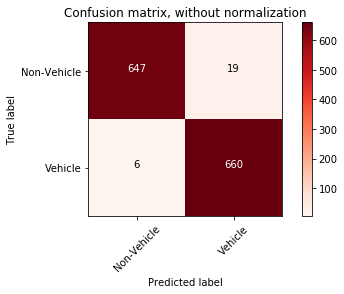

In [9]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig.savefig('plot.png')
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()